In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

plt.rcParams.update({'font.size': 12})

In [2]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_train[11].astype(np.float64))
y=np.array(y_train[12].astype(np.float64))
z=np.array(y_train[13].astype(np.float64))

x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)
x_test=x_test.astype(np.float64)
y_test=y_test.astype(np.float64)

def MEE(x, y):
    return np.mean(np.linalg.norm(x - y, 2, axis=1))

best_model_kernel=[]


,1,2,3,4,5,6,7,8,9,10
687,0.445595,0.990657,-0.956597,0.999904,0.928698,-0.374221,-0.596944,0.998460,-0.918228,-0.908724
500,-0.529859,0.467531,-0.990222,0.997941,0.998160,0.979726,-0.154151,0.976963,-0.947322,-0.164729
332,-0.408318,-0.986088,-0.424900,0.689264,0.989662,0.999424,0.232213,-0.859274,-0.928973,0.945868
979,-0.991869,-0.949900,0.863745,-0.965304,-0.297582,0.983168,0.416583,-0.989249,0.955648,0.485567
817,0.892729,-0.984880,0.400078,0.879861,0.996246,0.999561,0.518673,0.016348,-0.916941,0.184143
...,...,...,...,...,...,...,...,...,...,...
835,-0.944782,0.990340,-0.996558,0.999611,0.975064,-0.045848,-0.383247,0.973285,-0.738865,0.025588
192,-0.980479,0.963858,-0.998301,0.999707,0.991261,0.553833,0.426974,0.925641,-0.640025,0.162108
629,0.936792,-0.840416,0.988857,-0.964172,-0.960955,0.284024,0.440224,0.861808,0.867819,-0.998502
559,-0.040814,0.988425,-0.969966,0.999760,0.930516,-0.277490,-0.899592,0.995785,-0.935801,-0.730368


In [ ]:
C=np.logspace(0,4,30)
plt.figure(1,(12,4))
epsilon=[0.1,0.5]
for eps in epsilon:

    g=[0.01,0.2,5]
    for i,gamma in enumerate(g):
        parameters_SVM = {
        'estimator__C':C,
        'estimator__kernel': ['rbf'],
        'estimator__gamma':[gamma],
        'estimator__epsilon':[eps],
        'estimator__max_iter':[1000000]
    }
        grid_search_SVM = GridSearchCV(
        estimator=MultiOutputRegressor(SVR()),
        param_grid=parameters_SVM,
        cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=0),
        n_jobs=-1,
        return_train_score = True,
        scoring=make_scorer(MEE, greater_is_better=False),
    )
            
        SVM=grid_search_SVM.fit(x_train, y_train)
        cv_results_df = pd.DataFrame(grid_search_SVM.cv_results_)
        error=cv_results_df['mean_test_score'].values
        plt.subplot(1,len(g),i+1)
        #plt.subplots_adjust(wspace=0)
        if i==0:
            plt.ylabel('MEE validation')
        plt.title(r'$\gamma$='+str(gamma))
        plt.errorbar(C,-error,marker='.',label=r'$\epsilon$='+str(eps),linestyle='')
        plt.xlabel('C')
        plt.xscale('log')
        plt.yscale('log')
        plt.ylim(0.5,40)
        plt.legend()

plt.show()

## SVM RBF

In [ ]:

parameters_SVM= {
    'estimator__C': [10,100,1000,10000,20000],
    'estimator__kernel': ['rbf'],
    'estimator__gamma':[0.01,0.1,0.2,1],
    'estimator__epsilon': [0.1,0.3],
    'estimator__max_iter': [100000] 
}      

# with GridSearch
grid_search_SVM = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    scoring=make_scorer(MEE, greater_is_better=False),
)

SVM_rbf=grid_search_SVM.fit(x_train, y_train)
best_model_kernel.append(SVM_rbf)

In [ ]:
cv_results_df = pd.DataFrame(SVM_rbf.cv_results_)
best_model_index=SVM_rbf.best_index_

print('best params', SVM_rbf.best_params_) 

val_loss=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_loss=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]
print('Train loss:',train_loss,'+/-', train_std)
print('Validation loss:',val_loss,'+/-', val_std)

cv_results_df

## SVM poly

In [ ]:

C=np.logspace(0,4,5)

gamma=np.logspace(-2,2,5)

coef=np.linspace(0,10,3)

deg=np.arange(2,6,3)

parameters_SVM= {
    'estimator__C':C,
    'estimator__kernel': ['poly'],
    'estimator__gamma':gamma,
    'estimator__coef0':coef ,
    'estimator__degree':[5] ,
    'estimator__epsilon': [0.1],
    'estimator__max_iter':[1000] 
}      

# with GridSearch
grid_search_SVM = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    scoring=make_scorer(MEE, greater_is_better=False),
)

SVM_poly=grid_search_SVM.fit(x_train, y_train)
best_model_kernel.append(SVM_poly)

In [ ]:
cv_results_df = pd.DataFrame(SVM_poly.cv_results_)
best_model_index=SVM_poly.best_index_

print('best params', SVM_poly.best_params_) 

val_loss=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_loss=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]
print('Train loss:',train_loss,'+/-', train_std)
print('Validation loss:',val_loss,'+/-', val_std)

cv_results_df

## SVM sigmoid

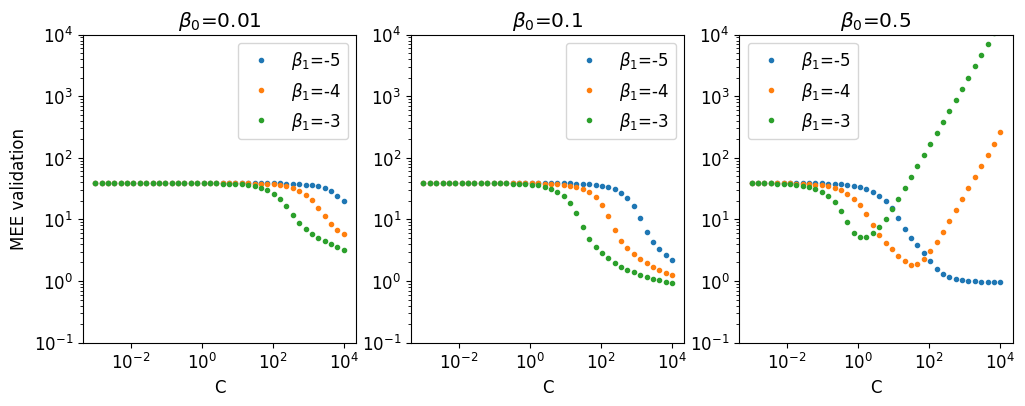

In [76]:
C=np.logspace(-3,4,40)

plt.figure(1,(12,4))
coef=[-5,-4,-3]
for c in coef:

    g=[0.01,0.1,0.5]
    for i,gamma in enumerate(g):
        parameters_SVM= {
        'estimator__C':C ,
        'estimator__kernel': ['sigmoid'],
        'estimator__gamma': [gamma],
        'estimator__coef0':[c],
        'estimator__epsilon': [eps],
}
        grid_search_SVM = GridSearchCV(
        estimator=MultiOutputRegressor(SVR()),
        param_grid=parameters_SVM,
        cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
        n_jobs=-1,
        return_train_score = True,
        scoring=make_scorer(MEE, greater_is_better=False),
    )
            
        SVM=grid_search_SVM.fit(x_train, y_train)
        cv_results_df = pd.DataFrame(grid_search_SVM.cv_results_)
        error=cv_results_df['mean_test_score'].values
        plt.subplot(1,len(g),i+1)
        #plt.subplots_adjust(wspace=0)
        if i==0:
            plt.ylabel('MEE validation')
        plt.title(r'$\beta_0$='+str(gamma))
        plt.errorbar(C,-error,marker='.',label=r'$\beta_1$='+str(c),linestyle='')
        plt.xlabel('C')
        plt.yscale('log')
        plt.xscale('log')
        plt.ylim(0.1,10000)
        plt.legend()

plt.show()

In [78]:

coef=np.linspace(-5,-2,4)


parameters_SVM= {
    'estimator__C':[100,1000,10000,50000],
    'estimator__kernel': ['sigmoid'],
    'estimator__gamma': [0.1,0.3],
    'estimator__coef0':coef,
    'estimator__epsilon': [0.1],
}      

# with GridSearch
grid_search_SVM = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    scoring=make_scorer(MEE, greater_is_better=False),
)

SVM_sigmoid=grid_search_SVM.fit(x_train, y_train)
best_model_kernel.append(SVM_sigmoid)

In [79]:
cv_results_df = pd.DataFrame(SVM_sigmoid.cv_results_)
best_model_index=SVM_sigmoid.best_index_

print('best params', SVM_sigmoid.best_params_) 

val_loss=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_loss=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]
print('Train loss:',train_loss,'+/-', train_std)
print('Validation loss:',val_loss,'+/-', val_std)

cv_results_df

best params {'estimator__C': 50000, 'estimator__coef0': -4.0, 'estimator__epsilon': 0.1, 'estimator__gamma': 0.3, 'estimator__kernel': 'sigmoid'}
Train loss: -0.1625193099212431 +/- 0.0014598575933366846
Validation loss: -0.51329043799485 +/- 0.04417671890444293


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__coef0,param_estimator__epsilon,param_estimator__gamma,param_estimator__kernel,params,...,split42_train_score,split43_train_score,split44_train_score,split45_train_score,split46_train_score,split47_train_score,split48_train_score,split49_train_score,mean_train_score,std_train_score
0,0.091815,0.028991,0.022794,0.005582,100,-5.0,0.1,0.1,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -5.0...",...,-35.242892,-35.681553,-35.228761,-35.683277,-34.928448,-34.767045,-35.351332,-35.799511,-35.307855,0.300148
1,0.088996,0.023093,0.021181,0.006687,100,-5.0,0.1,0.3,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -5.0...",...,-12.138966,-12.035868,-12.064302,-12.237138,-11.996876,-12.208174,-12.095563,-12.178403,-12.132590,0.132634
2,0.077232,0.011492,0.019349,0.003136,100,-4.0,0.1,0.1,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -4.0...",...,-17.900360,-18.139531,-18.038985,-18.120464,-17.773906,-17.836511,-18.053055,-18.136837,-17.994733,0.155039
3,0.109995,0.031134,0.021414,0.008352,100,-4.0,0.1,0.3,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -4.0...",...,-1.711053,-1.716478,-1.715350,-1.753932,-1.727130,-1.752608,-1.719673,-1.659454,-1.731320,0.028452
4,0.081900,0.014128,0.017714,0.002661,100,-3.0,0.1,0.1,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -3.0...",...,-2.756852,-2.795452,-2.770050,-2.794607,-2.767302,-2.831969,-2.693616,-2.784960,-2.770650,0.038844
5,0.203687,0.020489,0.015399,0.001515,100,-3.0,0.1,0.3,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -3.0...",...,-0.572054,-0.579748,-0.580038,-0.574064,-0.582956,-0.592198,-0.566250,-0.590916,-0.579689,0.008866
6,0.107735,0.024028,0.019083,0.006211,100,-2.0,0.1,0.1,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -2.0...",...,-1.206128,-1.235109,-1.258142,-1.221051,-1.223093,-1.270263,-1.218557,-1.235328,-1.231680,0.015100
7,0.157495,0.042070,0.021904,0.006459,100,-2.0,0.1,0.3,sigmoid,"{'estimator__C': 100, 'estimator__coef0': -2.0...",...,-35.009854,-35.134391,-34.209373,-33.793016,-35.165558,-36.657072,-34.450302,-32.999481,-34.827053,1.053650
8,0.083212,0.018233,0.020065,0.002485,1000,-5.0,0.1,0.1,sigmoid,"{'estimator__C': 1000, 'estimator__coef0': -5....",...,-13.609739,-13.600636,-13.601218,-13.679197,-13.490278,-13.764890,-13.642153,-13.617727,-13.640731,0.106520
9,0.103613,0.020575,0.018153,0.004356,1000,-5.0,0.1,0.3,sigmoid,"{'estimator__C': 1000, 'estimator__coef0': -5....",...,-1.270201,-1.264175,-1.293915,-1.290051,-1.272073,-1.329538,-1.304852,-1.245933,-1.281486,0.024541


In [ ]:
val_acc=[]
for model in best_model_kernel:
    val_acc.append(model.best_score_)

SVM=best_model_kernel[np.argmax(np.array(val_acc))]

print('best params:',SVM.best_params_)

Test-error: 0.4768612509123645


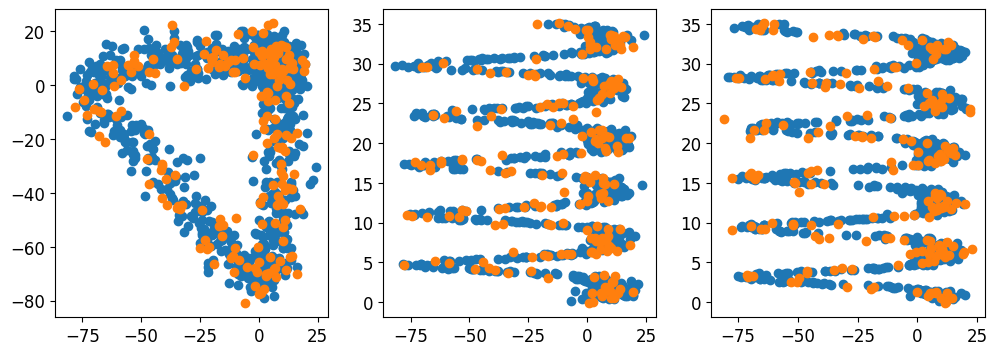

In [66]:
y_pred=SVM.predict(x_train)

plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.scatter(y_pred[:,0],y_pred[:,1])
plt.subplot(132)
plt.scatter(x,z)
plt.scatter(y_pred[:,0],y_pred[:,2])
plt.subplot(133)
plt.scatter(y,z)
plt.scatter(y_pred[:,1],y_pred[:,2])
plt.show()